# Police Station Placement Based on Nearby Crime

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

Our project aims to shine light on the issues of crime rate in Los Angeles county and explores its relationship with the locations of police stations. By utilizing the data of crime records collected by the LA Police Department from 2010-present combined with current locations of LAPD police stations, we attempted a geographic data analysis and discovered trends in crime types and the locations associated with it. We found that [signficant founding from geopandas EDA here]

Furthermore, we performed clustering algorithms that propose alternative/new locations for police stations around the county to more effectively distribute station locations. [Talk about kmeans not being able to evenly distribute crime to stations?] Through this we conclude that [TBD]

# Names
- Nathan Ahmann
- Alex Guan
- Alan Miyazaki
- Renaldy Herlim

<a id='research_question'></a>
# Research Question

Does crime happen more or less frequently around police stations and can that knowledge be used to more effectively distribute police station locations?

<a id='background'></a>

## Background & Prior Work

Los Angeles has solidified itself as a historic city in America, with positive connotations such as art and film, along with negative ones such as crime rate. The latter has especially had an impact on the culture surrounding the city, as policing of the area has only grown to be more controversial. The city has observed a wide variety of crimes, ranging from petty theft to mass shootings. Due to how controversial the policing of the country has been, especially with the increasing prevalence of movements like BLM, Los Angeles has had the effectiveness of its law enforcement questioned. NPR discusses this topic during Planet Money: "When You Add More Police To A City, What Happens?"[^NPR], which explores how effective mass policing is for cities with varying levels of crime. Economists appear to have evidence that increasing the police force for the average city helps to prevent crime overall, but this is not observed in certain areas with a larger Black population. While there is an increase in arrests for lower level crimes, it seems that the homicide rate is effectively left unchanged. The article points to areas in the South and Midwest with this description, so our group wanted to consider the West Coast and specifically Los Angeles.

The Violence Project[^Violence] takes a comprehensive look at mass shootings from around the country in the past sixty years, with a total of 187 up to March 2021. The database contains over 200 different variables to preview, allowing someone to explore motivations, weapons, background, etc. The website directly provides the ability to filter through the list of shooters, and additionally contains statistics on how prevalent they are in the data. This project in particular is focused exclusively on mass shootings and contains less than 200 rows of data (thankfully), so we decided to expand our project to all forms of crime within LA county.

With all of the former in mind, we settled on investigating how the proximity of police stations may impact the crime in certain parts of Los Angeles. A common train of thought is that less crime would happen around police stations because they would act as deterents against crime. One related study found that crime rate increased around areas where a police station closed [^blesse]. They suggested that this supported previous papers claiming that more police stations are effective at detering crime, but that the measurement of deterence is hard to calculate. Another paper found more some actual numbers, stating that police stations in Buenos Aires created a 500-600m zone of decreased crime [^fondevila]. This is more in line with what we would like to investigate. By considering location data, we can see if police station prescene has any effects on the number of crimes or on the types of crimes commited.

[^blesse] Blesse, S., &amp; Diegmann, A. (2022). The place-based effects of police stations on crime: Evidence from station closures. Journal of Public Economics, 207, 104605. https://doi.org/10.1016/j.jpubeco.2022.104605 

[^fondevila] Fondevila, G., Vilalta-Perdomo, C., Galindo Pérez, M. C., &amp; Cafferata, F. G. (2021). Crime deterrent effect of police stations. Applied Geography, 134, 102518. https://doi.org/10.1016/j.apgeog.2021.102518 

[^NPR] Rosalsky, G. (2021, April 20). When you add more police to a city, what happens? NPR. Retrieved March 5, 2023, from https://www.npr.org/sections/money/2021/04/20/988769793/when-you-add-more-police-to-a-city-what-happens 

[^Violence] Most comprehensive mass shooter database. The Violence Project. (2023, January 31). Retrieved March 5, 2023, from https://www.theviolenceproject.org/mass-shooter-database/ 

# Hypothesis



We believe that less crime will happen closer to police stations which would imply that the presence of a police station deters crime. If criminal activity happens less around police stations then it would be important to effectively spread out police stations in order to minimize crime rate as a whole.

# Dataset(s)

All of these are from the official LA City database and geohub.

### Dataset 1: Los Angeles Crime Data from 2020 to Present (March 1st 2023)  
[Link to dataset 1](https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8)   
  
Number of observations: 673,367 
This dataset includes information on crimes that took place in Los Angeles between 2020 and March 1st 2023.
Since Dataset 2 and 3 have the same columns, the row information and relevant column is below.

### Dataset 2: Los Angeles Crime Data from 2010 to 2019
[Link to dataset 2](https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z)  
  
Number of observations: 2,119,797 
This dataset includes information on crimes that took place in Los Angeles between 2010 and 2019.  

Each row represents a single crime that took place.
The relevant columns are:
* DR_NO - Divisions of Records number. Acts as an unique ID for the crime
* DATE_OCC - The date that the crime occured
* AREA - contains the geographic area code for the police station. These are 1-21 and correspond to 1 of the 21 police stations.
* Crm Cd Desc - description of the criminal code. Essentially a human readable crime category
* LOCATION - street address the crime took place at
* LAT, LONG - latitude and longitude

### Dataset 3/4: Los Angeles Police Station Locations and Division Shapes
These datasets are geographical information. Dataset 3 contains info we used mainly to get the LONG/LAT of each police station, and Dataset 4 contains shape files used for plotting. We also made use of the area metric from Dataset 4 for some calculated fields. 

[Link to dataset 3](https://geohub.lacity.org/datasets/lapd-police-stations)   
Number of observations: 21  
This dataset contains information on all 21 of LA City's Police Stations. If we find that our crime data extends past the city or want a more precise location, then we might make use of the extended data for LA county that includes more Police Stations and additioanlly includes Sheriff stations.

Each row of the dataset contains information for one police station.  
The relevant columns are:
* DIVISION - the division the police station is under
* LOCATION - an address for the police station. Since we would rather have a more precise location we might convert these to latitude/longitude or use the alternative dataset.
* PREC - the precinct each station is in charge of 

[Link to dataset 4](https://geohub.lacity.org/datasets/031d488e158144d0b3aecaa9c888b7b3_0/explore?location=33.985210%2C-118.389876%2C11.32)  
Number of observations: 21  
This dataset contains information on all 21 of LA City's Police Stations. If we find that our crime data extends past the city or want a more precise location, then we might make use of the extended data for LA county that includes more Police Stations and additioanlly includes Sheriff stations.

Each row of the dataset contains information for one precinct.  
The relevant columns are:
* APREC and PREC - the division and number of the precinct
* AREA - the size of the shape generated by the polygon (not sure what units, but consistent across shapes so comparable)




### Combining the Datasets
Dataset 1 and 2 contain our crime data. Due to coming from the same source, they are quite easy to combine and contain the same columns so we can simply concatenate them together (aside from a typo in one of them).


Dataset 3 and 4 are used for geographical data, specifically LONG/LAT of police stations and the shape of each precinct. Combining them is simple due to the LONG/LAT being a universal metric. Additionally the precinct numbers correctly match up. Both of those metrics not only allow them to be used with each other but also with Dataset 1 and 2.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import geopandas as gpd

from sklearn.cluster import KMeans

# removes warning messages (specifically used to avoid future warning clutter)
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning

Since the two crime datasets were from the same organization (LAPD), the two sets were really easy to combine. The only change that needed to be done was that the dataset from 2010-2019 had a space in column name for Area while the dataset for 2020-present did not. Aside from this, all other columns were the same and the datasets were easily combined.

In [2]:
# Reading datasets from two different time periods
# https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z
past_df = pd.read_csv("Crime_Data_from_2010_to_2019.csv", dtype = {"TIME OCC": str})
# https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8
present_df = pd.read_csv("Crime_Data_from_2020_to_Present.csv", dtype = {"TIME OCC": str})

# past dataset has column name typo
past_df = past_df.rename(columns={"AREA ": "AREA"})
# Both datasets use the same columns 
df = pd.concat([past_df, present_df])

The crime dataset had quite a few columns that were unnecessary to us. Mainly these were columns containing codes that law enforcement used internally. However, these columns usually had a description column in the dataset so the code column was unnecessary for us. The only exception were Mocodes and Part 1-2 which are internally used codes but did not contain an associated description column. However after looking into what these codes meant, it was decided that they did not provide any use to us and were removed. In addition to this, we also removed Date Rptd (date crime was reported) since we only care about when the crime occured and not when it was reported. We also replaced the codes in Vict Descent with their actual descriptions that was provided in the site the dataset came from. Lastly, we converted DATE OCC to a datetime object.

In [3]:
# Dropping code columns since these are internal use and we don't get much 
# value from them given we have their description in a seperate column
df = df.drop(columns=[
    "Crm Cd", "Crm Cd 1", "Crm Cd 2", "Crm Cd 3", 
    "Crm Cd 4", "Premis Cd", "Weapon Used Cd", 
    "Mocodes", "Part 1-2", "Status", "Date Rptd"
    ])

# Changed code to be readable description
df["Vict Descent"] = df["Vict Descent"].replace({
                            "A": "Other Asian", 
                            "B": "Black", 
                            "C": "Chinese", 
                            "D": "Cambodian", 
                            "F": "Filipino", 
                            "G": "Guamanian", 
                            "H": "Hispanic/Latin/Mexican", 
                            "I": "American Indian/Alaskan Native", 
                            "J": "Japanese", 
                            "K": "Korean", 
                            "L": "Laotian", 
                            "O": "Other", 
                            "P": "Pacific Islander", 
                            "S": "Samoan", 
                            "U": "Hawaiian", 
                            "V": "Vietnamese", 
                            "W": "White", 
                            "X": "Unknown", 
                            "Z": "Asian Indian",
                        })

# changed to DateTime
df["DATE OCC"] = pd.to_datetime(df['DATE OCC'])

Cleaning the geographic data was a similar process, but we left the datasets separate since it makes more sense.   

For Dataset 1 we just renamed X and Y to Longitude. Latitude.  
For Dataset 2 we dropped some columns that are repeated. 

In [4]:
LAPD_df = pd.read_csv("LAPD_Police_Stations.csv")
map_df = gpd.read_file('LAPD_Divisions.shp') 

# Renamed X,Y to Longitude, Latitude
LAPD_df = LAPD_df.rename(columns={
    "X": "Longitude", 
    "Y": "Latitude"
    })

# drop irrelevant columns
map_df = map_df.drop(columns=['OBJECTID', 'SHAPE_Leng', 'SHAPE_Area'])

During some initial EDA and plotting we found that there was data that was at (0, 0). These crimes did have information filled in for the lcoation column that we could have used to impute a Longitude, Latitude, but instead we opted to just drop them since there was only a few thousand of our million data points. 

Even after dropping them we found that many crimes took place outside of LA and the precinct boundaries. To avoid these affecting any location analysis and because it seemed largely random which precinct the crime was assigned to, we also decided to drop those.

Size before removing (0,0) crimes:  2799848
Size after removing (0,0) crimes:  2799848
Dropped 0 rows, which is 0.0 % of the entire dataset


AttributeError: 'NoneType' object has no attribute 'remove'

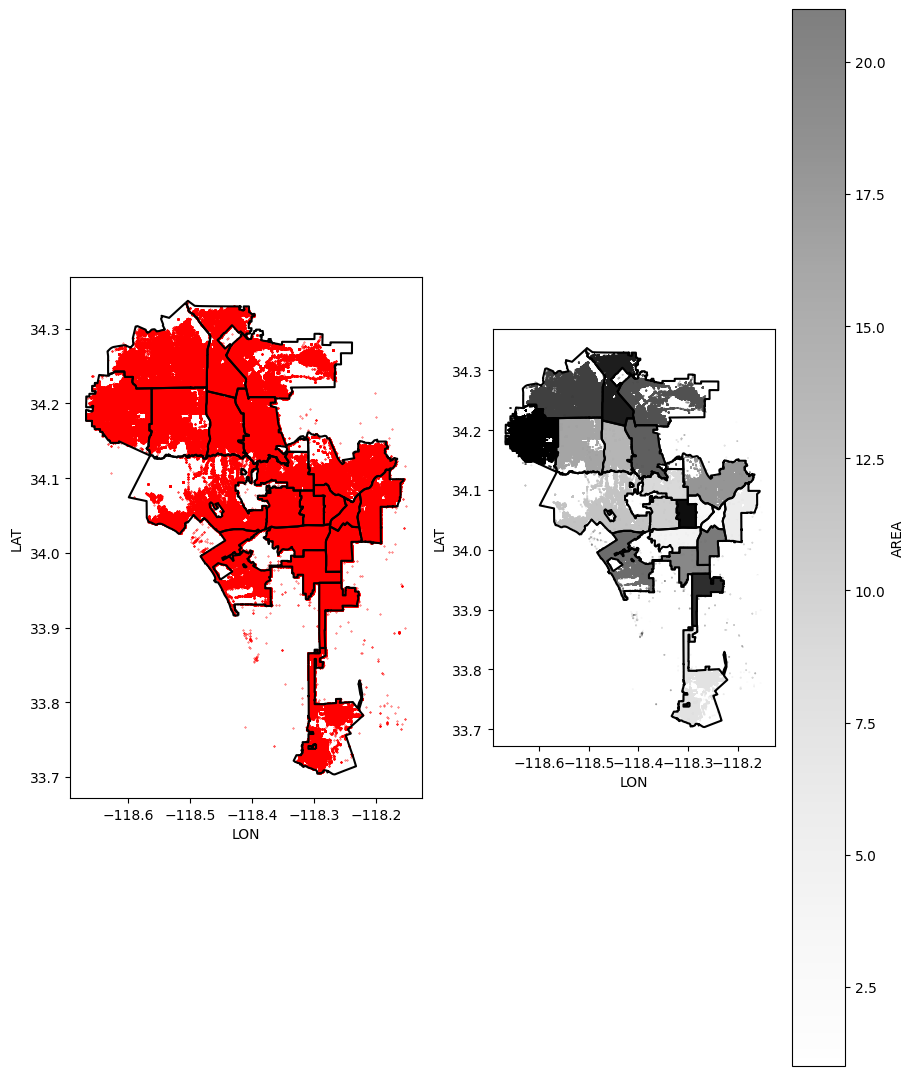

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (10, 20))

# plot the data before dropping
map_df.boundary.plot(color='black', ax=ax[0])
df.plot(ax=ax[0], x='LON', y='LAT', kind='scatter', c='red',  s=0.1)

# drop the 0,0 data and show how much data was dropped
before_size = df.shape[0]
df = df.drop(df.loc[df['LAT'] < 1].index)
df = df.drop(df.loc[df['LON'] > -1].index)
after_size = df.shape[0]
print('Size before removing (0,0) crimes: ', before_size)
print('Size after removing (0,0) crimes: ', after_size)
print('Dropped',before_size - after_size,'rows, which is',(before_size - after_size) / before_size,'% of the entire dataset')

# plot the data after dropping
map_df.boundary.plot(color='black', ax=ax[1])
df.plot(ax=ax[1], x='LON', y='LAT', kind='scatter', c='AREA',  s=0.1, alpha=0.5)

ax[1].get_legend().remove()

# drop data outside of LA precinct area

before_size = df.shape[0]
# arbitrarily chosen bounds for LA area
df = df.loc[(df['LAT'] >= 33.7) & (df['LAT'] <= 34.37) & (df['LON'] >= -118.7) & (df['LON'] <= -118.15)]
after_size = df.shape[0]
print('Before: ', before_size)
print('After: ', after_size)
print('Dropped',before_size - after_size,'rows, which is',(before_size - after_size) / before_size,'% of the entire dataset')

The plot on the left shows the original data plotted. Clearly some of the points are extreme outliers and will mess up any geographic analysis. The plot on the right shows the data after just dropping the (0, 0) points. This time the area can be seen better, but there are still lots of crimes outside the zones. Additionally, we include a precinct color mapping this time and the points outside have a variety of colors instead of all corresponding to a single precinct or to the closest precinct. This means that there is not a clear pattern of which precinct is responsible for a crime outside the boundaries. Our final version of the map, with proper boundaries can be found later in our paper.

Later on in our EDA and analysis we do some additional operations that could be considered data cleaning. These were done for calculated fields or for specific plotting/analysis purposes. We left them in their own sections to make the code easier to follow and because our dataset at this point represents a cleaned dataset that others could use for their own purposes.

# Data Analysis & Results

### Initial EDA

Add in some EDA above -- New year stuff

### Geospatial EDA

Now let's move into our geospatial analysis. The first thing to look at is a map of the area we are looking at and where all the crimes were commited.

<AxesSubplot: xlabel='Longitude', ylabel='Latitude'>

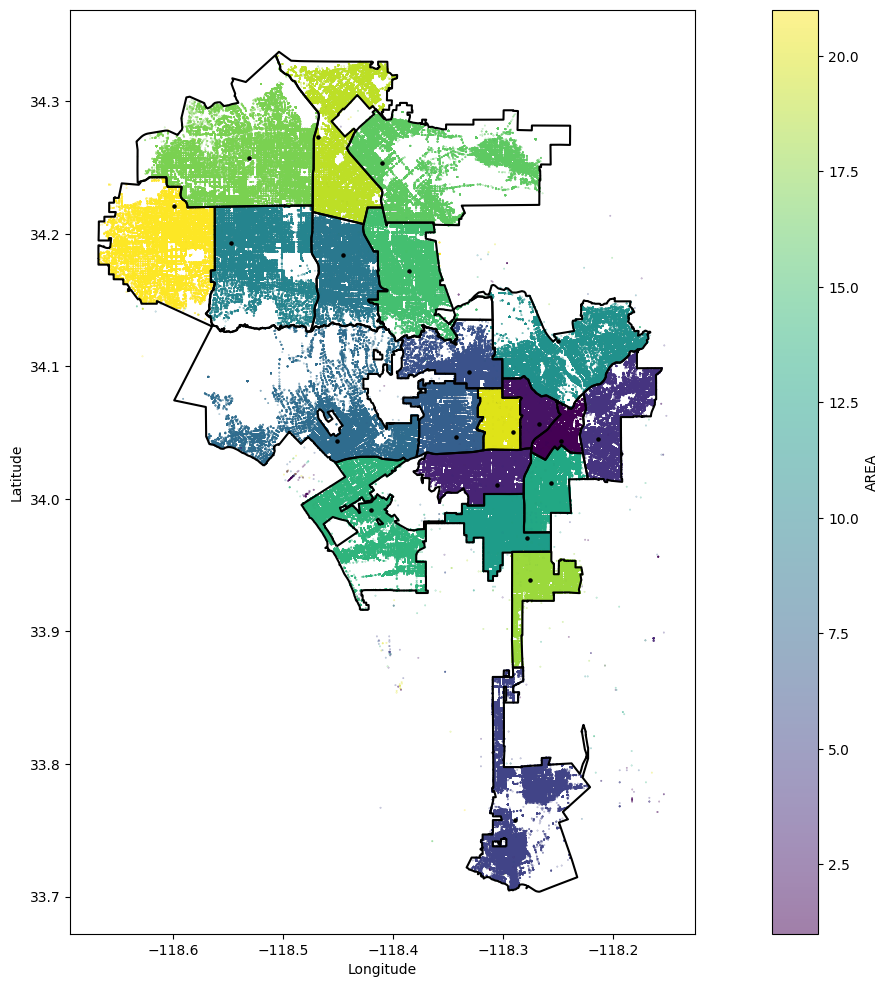

In [12]:
fig, ax = plt.subplots(1, figsize = (10, 6))
map_df.boundary.plot(color='black', ax=ax)
df.plot(ax=ax, x='LON', y='LAT', kind='scatter', c='AREA',  s=0.1, alpha=0.5, cmap='viridis')
LAPD_df.plot(ax=ax, x='Longitude', y='Latitude', kind='scatter', s=5, c='black');

This map is great for seeing the location of crimes and getting an idea about various size, shapes, and locations of the precincts. With that as a starting point, let's look at more specific data. First we decided to look at the number of crimes commited in each area, the size of each precinct, and if the amount of crimes corresponds to the size of the precinct.

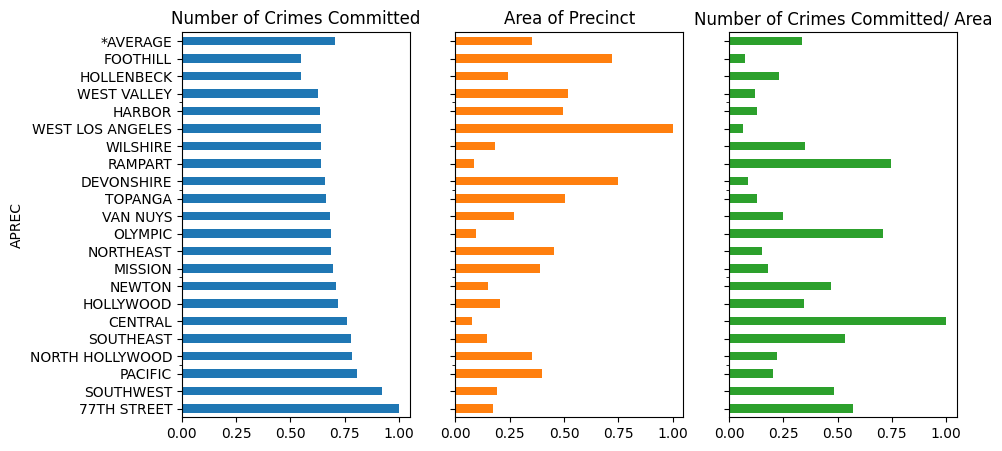

In [57]:
# setting up a merged crime count table that has counts and area of precincts using df and map_df
crime_counts = map_df.merge(df.groupby('AREA')[['DR_NO']].count().rename(columns={'DR_NO':'CRIME_COUNT'}), left_on='PREC', right_on='AREA')
crime_counts = crime_counts.sort_values(by='CRIME_COUNT', ascending=False)

crime_counts['CRIME_COUNT_VS_AREA'] = crime_counts['CRIME_COUNT'] / crime_counts['AREA']

# adding an average
meandict = dict(crime_counts.mean())
meandict['APREC'] = '*AVERAGE'
crime_counts = crime_counts.append(meandict, ignore_index=True)

crime_counts['scaled_AREA'] = crime_counts['AREA'] / crime_counts['AREA'].max()
crime_counts['scaled_CRIME_COUNT'] = crime_counts['CRIME_COUNT'] / crime_counts['CRIME_COUNT'].max()
crime_counts['scaled_CRIME_COUNT_VS_AREA'] = crime_counts['CRIME_COUNT_VS_AREA'] / crime_counts['CRIME_COUNT_VS_AREA'].max()
crime_counts.plot(
    kind='barh', 
    x='APREC', 
    y=['scaled_CRIME_COUNT','scaled_AREA','scaled_CRIME_COUNT_VS_AREA'], 
    subplots=True, layout=(1,3), 
    figsize=(10, 5), 
    sharex=True, sharey=True,
    legend=False,
    title=['Number of Crimes Committed', 'Area of Precinct', 'Number of Crimes Committed/ Area']
);

These 3 plots show us lots of relevant information for our question. Firstly, not each precinct has the same amount of crimes commited. There is a difference of 70,000 crimes committed between the minimum and maximum (this graph is all max-scaled, due to issues plotting different tick lengths in subplots. Additionally the units for area are ambigious). Despite this range, a large amount of the precincts do have similar amounts of crimes committed within them, but the deviation on the edges 

On the other hand, the size of the precincts is all over the place. Based on these charts, we can see that Central has an average amount of crime compared to the other precincts, but it has one of the smallest areas. This leads it to have the largest Crime / Area value which is about 3 times more than the average.

So are there better ways we could arrange the police stations? Are there other factors we should take into consider for police station placement?

### Applying K-Means

This moves us into our first analysis for our project. Since the size of each precinct and the amount of crime commited isn't balanced, we attempted to see if there are better boundaries and locations for the police stations.

We did this by using  K-Means Clustering. The idea was that we could find new locations for police centers and precinct boundaries mathmatically by taking into account the number of crimes in each area. We would expect these to more effectively spread the crimes among police stations, but also to not be too different from the current locations.

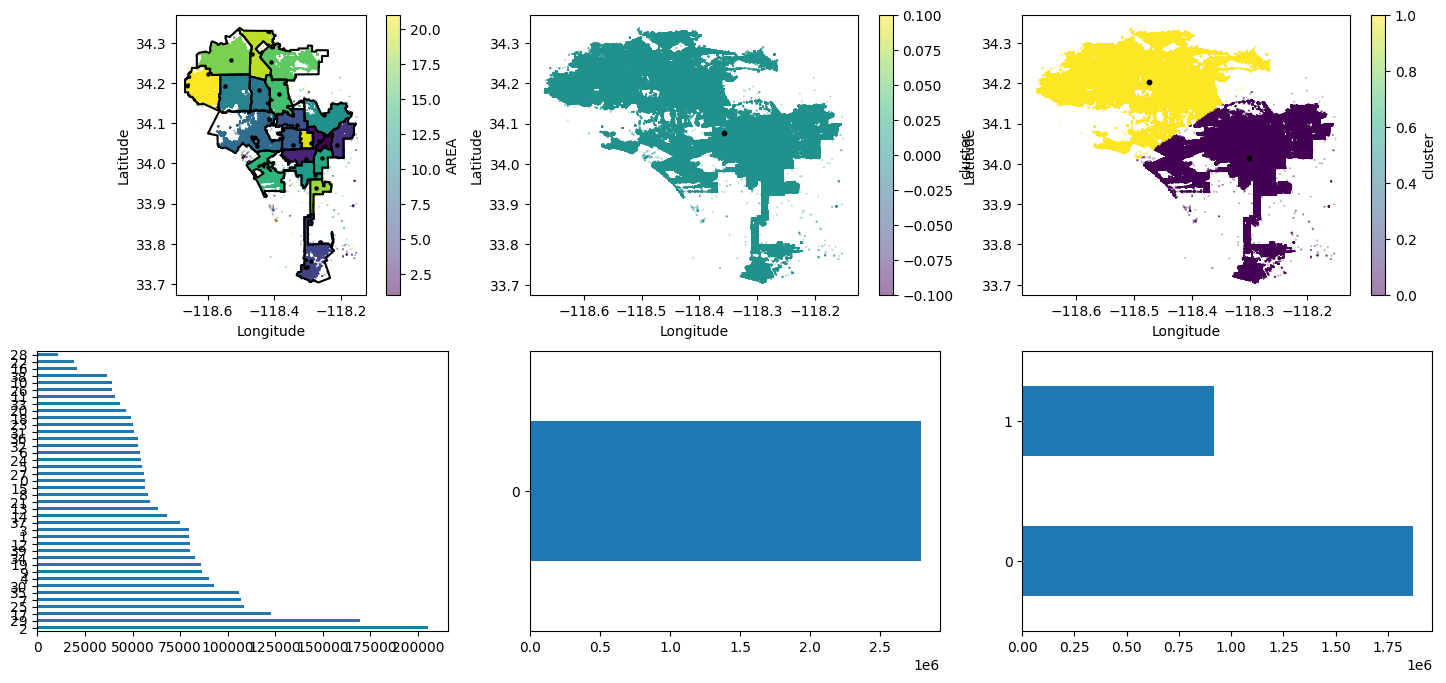

In [18]:
# num_clusters = [21, 10, 40]

num_clusters = [1, 2]
fig, ax = plt.subplots(2, len(num_clusters) + 1, figsize = (18, 8))

# original plot with police stations and original precincts as clusters
map_df.boundary.plot(color='black', ax=ax[0][0])
df.plot(ax=ax[0][0], x='LON', y='LAT', kind='scatter', c='AREA',  s=0.1, alpha=0.5, cmap='viridis')
LAPD_df.plot(ax=ax[0][0], x='Longitude', y='Latitude', kind='scatter', s=5, c='black')
df["cluster"].value_counts().plot(kind="barh", ax=ax[1][0])

for n in range(len(num_clusters)):
    # calculate k-means with n clusters
    kmeans = KMeans(n_clusters = num_clusters[n])
    kmeans.fit(df[["LON", "LAT"]])

    # make a df of the centers
    centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=['Longitude', 'Latitude'])

    # add a cluster label to each crime
    df["cluster"] = kmeans.predict(df[["LON", "LAT"]])

    # plot the precinct shapes, plot the cluster labeled crimes, plot the centers
    # map_df.boundary.plot(color='black', ax=ax[0][n])
    df.plot(ax=ax[0][n+1], x='LON', y='LAT', kind='scatter', c='cluster',  s=0.1, alpha=0.5, cmap='viridis')
    centers_df.plot(ax=ax[0][n+1], x='Longitude', y='Latitude', kind='scatter', s=10, c='black') 

    # plot a bar chart of number of crimes per cluster
    df["cluster"].value_counts().plot(kind="barh", ax=ax[1][n+1])


This plot has a lot to unpack so let's go through each part of it.  
The top row contains maps just like our earlier one, with each of the points being a crime and the color corresponding to the precinct/cluster it belongs to. The bottom row contains bar charts that show the number of crimes in each precinct/cluster.

Each map and bar chart are paired with each other. We first plotted our results of having 21 clusters, which would be the same number of precincts as the city currently has. These centers are close to their originals, but there are some slight movements that suggest the current locations are not optimal clusters. Despite that, we actually have a different distribution of crimes per precinct and it is less balanced than the original.

With that in mind we tried having half as many precincts and twice as many precincts. 

add more explanation for above and transition to next analysis

move into either distance calculations or the arcgis, not sure which first

#### ArcGIS Maximize Coverage Method


ArcGIS offers algorithms to chose the best locations for a certain goal, the "Choose Best Facilities" allows you to choose the best locations for facilities. The tool allocates locations with demand for the facilities in a way that satisfies the specified goal.

Our goal is to see if there could be better locations to place police stations so that crimes are evenly more distributed among stations. This algorithm maximizes the amount of demand covered within a specific time or distance of the facilities, in our case we are minimizing the driving time required from police stations to crimes in the area. 

Demand in our case is the amount of crime, and each demand location is where a crime occurs. For the purpose of simplifying the solution, we will pick an arbitrary type of crime and focus only on crimes that are labeled as "Attempted Robbery", and we will be using 2020-Present dataset. This goal chooses facilities such that the maximum amount of demand is allocated, with all the demand from each demand location allocated to the single facility closest to it.

In theory we should get the best places to place these stations geographically, but let's see how it does for distributing crimes evenly.

In [ ]:
new_max_stations = pd.read_csv('new_maximized_stations.csv')
new_max_stations = new_max_stations[new_max_stations['Facility Type'] == "Chosen"]
new_max_stations.head()

In [ ]:
crime_locations = pd.read_csv('crime_attempted_robbery_locations.csv')

#Filter the crimes that are selected for the maximizing demand algorithm
list_facility_ids = list(new_max_stations['OBJECTID_1'].unique())
crime_locations = crime_locations[crime_locations['Assigned Facility ID'].isin(list_facility_ids)]

#Plot the counts of crimes for the new assigned police station locations
crime_locations['Assigned Facility ID'].value_counts().plot(kind='barh') #The assigned new location for that crime

Interestingly when we set the amount of new locations = 21 (The same number of current police stations and number of precincts) the algorithm suggested that multiple police stations be placed on certain precincts and none at all in some of the precincts. This finding suggests that maybe there needs to be reformation in the policing system to maximize coverage of crimes. This could mean that in high demand areas there are not enough police stations to cover for the amount of crime that happens in the area, and in the low demand areas, the amount of policing/stations could potentially be reduced and have those resources be allocated somewhere with a higher crime rate. However, this was done on only one type of crime "Attempted Robbery" and the answer can't be generalized to all types of crime. 

# Ethics & Privacy

One of the main bias issues in our dataset, is that it only contains reported crimes. Since crimes must be reported by police officers, they inherently are linked to the prescence of a nearby police station. While we would expect this to increase volume of crimes reported nearby police stations, our hypothesis goes against that expectation by assuming that the deterence of a police station will outweight this effect. In order to address this we will carefully word our analysis descriptions and take this into account in our conclusions. 

Another potential bias in our dataset is that since it is only covering the area of Los Angeles and might not be representative of crime in general for the rest of the state/nation; furthermore, our data could also have an imbalanced proportion of populations due to the nature of policing and crime. In particular, the overpolicing of low income and minority areas could skew our analyses results and present problematic solutions. To tackle this problem, we will carefully analyze for these patterns in our dataset and point them out if/when they arise, as well as preface our solutions with a warning.

Privacy should be well protected because the records do not include the names of the victim or culprit. The only thing that links the crime to the people involved is the Division of Records Number serving as an ID of each crime. However only the Los Angeles Police Department has access to the records. In addition to this, the Los Angeles Police Department specified in the description that they round the addresses to the nearest hundred blocks to protect privacy.

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*